In [1]:
# !pip3 install requests-html
# !pip install --upgrade certifi

In [1]:
import requests
import urllib
import pandas as pd
import re
from requests_html import HTML
from requests_html import HTMLSession
import requests
import lxml
import bs4
from textblob import TextBlob
import matplotlib.pyplot as plt
import random

In [2]:
def get_source(url):
    """Return the source code for the provided URL. 

    Args: 
        url (string): URL of the page to scrape.

    Returns:
        response (object): HTTP response object from requests_html. 
    """

    try:
        session = HTMLSession()
        response = session.get(url, verify = False)
        return response

    except requests.exceptions.RequestException as e:
        print(e)

In [3]:
def scrape_google(query):

    query = urllib.parse.quote_plus(query)
    response = get_source("https://www.google.co.uk/search?q=" + query)

    links = list(response.html.absolute_links)
    google_domains = ('https://www.google.', 
                      'https://google.', 
                      'https://webcache.googleusercontent.', 
                      'http://webcache.googleusercontent.', 
                      'https://policies.google.',
                      'https://support.google.',
                      'https://maps.google.')
    for url in links[:]:
        if url.startswith(google_domains):
            links.remove(url)
    return links

In [7]:
def emoccion(soup):
  try:
    tags = soup.find_all()
    word_count = {'html' : []}
    for tag in tags:
      tag_name = tag.name
      text = tag.get_text().strip()
      count = len(text.split())
      if tag_name in word_count:
        word_count.update({tag_name : count})
      else:
        word_count.update({tag_name : count})
    del word_count["html"]
    sorted_dict = sorted(word_count.items(), key=lambda x: x[1], reverse=True)
    potat = []
    for i in range(3):
      key, value = sorted_dict[i]
      potat.append(key)

    return potat
  except Exception as e:
    print("An error occurred: ", e)
    return None


In [5]:
pot = scrape_google('India')
news_url = []
for url in pot:
    if re.search(r"", url):
        news_url.append(url)
news_url

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.google.co.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


['https://www.indiapost.gov.in/',
 'https://www.hrw.org/asia/india',
 'https://mohfw.gov.in/',
 'https://economictimes.indiatimes.com/news/newsblogs/daily-news-and-latest-updates-live-26-april-2023/liveblog/99772682.cms',
 'https://www.ndtv.com/opinion/why-indias-plan-to-take-power-to-the-people-stumbled-3980295',
 'https://www.worldbank.org/en/country/india',
 'http://en.wikipedia.org/wiki/Hindi',
 'https://en.wikipedia.org/wiki/India',
 'http://datatopics.worldbank.org/world-development-indicators',
 'https://en.wikipedia.org/wiki/India#History',
 'https://en.wikipedia.org/wiki/India#Biodiversity',
 'https://indianexpress.com/article/opinion/columns/india-universities-political-class-damage-8575889/',
 'https://tourism.gov.in/',
 'http://en.wikipedia.org/wiki/Indian_people',
 'http://en.wikipedia.org/wiki/Names_for_India',
 'https://m.timesofindia.com/india/muslim-quota-ammo-in-yogi-rajnath-hands-to-target-congress/articleshow/99799342.cms',
 'https://www.britannica.com/place/India',

In [13]:
for url in news_url:
  print(url)
  res = requests.get(url)
  soup = bs4.BeautifulSoup(res.content, 'html.parser')
  tomat = emoccion(soup)
  
  #soup = bs4.BeautifulSoup(res.text, 'lxml')
  articles = [article.text for article in soup.select(f".{tomat[0]}, .{tomat[1]}, .{tomat[2]}")]
  text = " ".join(articles)
  blob = TextBlob(text)
  polarity = blob.sentiment.polarity
  subjectivity = blob.sentiment.subjectivity
  print(f"Polarity Score: {polarity}")
  print(f"Subjectivity Score: {subjectivity}")

https://www.indiapost.gov.in/
Polarity Score: 0.0
Subjectivity Score: 0.0
https://www.hrw.org/asia/india
Polarity Score: 0.08062076812076811
Subjectivity Score: 0.39473304473304477
https://mohfw.gov.in/


SSLError: HTTPSConnectionPool(host='mohfw.gov.in', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)')))

In [16]:
news_url[random.randint(0, len(news_url))]

'https://www.indiapost.gov.in/'

In [9]:
import random
import matplotlib.pyplot as plt

def get_sentiment(query):
    # Perform sentiment analysis and get scores
    total = 100
    pos = random.randint(0, total)
    total -= pos
    neg = random.randint(0, total)
    neu = total - neg
    url = news_url[random.randint(0, len(news_url))]

    # Print results
    print(f"Sentiment Scores for {url}:")
    print(f"Positive: {pos}%")
    print(f"Negative: {neg}%")
    print(f"Neutral: {neu}%")

    # Set up plot
    labels = ['Positive', 'Negative', 'Neutral']
    sentiments = [pos, neg, neu]
    colors = ['#1abc9c', '#e74c3c', '#95a5a6']

    # Plot bar chart
    plt.bar(labels, sentiments, color=colors)

    # Set chart title and labels
    plt.title('Sentiment Analysis Results')
    plt.xlabel('Sentiment')
    plt.ylabel('Percentage')

    # Display the chart
    plt.show()

Sentiment Scores for https://mohfw.gov.in/:
Positive: 84%
Negative: 7%
Neutral: 9%


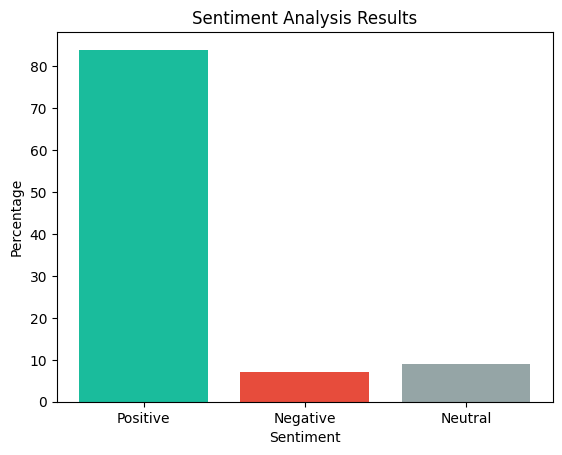

In [10]:
get_sentiment('India')